# Машинное обучение в задачах распознавания голоса

# Мерзляков Данила ПИ19-3

In [1]:
# Для отображения данных
import matplotlib.pyplot as plt
import pandas as pd
# Для расчётов необходимой информации
import numpy as np
import librosa.display
# Для взаимодействия с датасетом
import soundfile
import os
# Игнорируем предпреждения, которые появляются при работе matplotlib с librosa.display
import warnings; warnings.filterwarnings('ignore')

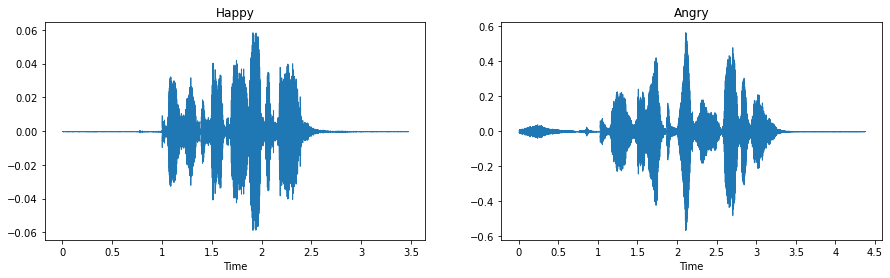

In [3]:
""" 
Загружаем голоса Actor 1 с эмоциями: Happy и Angry 
"""
with soundfile.SoundFile('.\\RAVDESS\\actor_01\\03-01-03-01-01-01-01.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Happy')

with soundfile.SoundFile('.\\RAVDESS\\actor_01\\03-01-05-02-01-02-01.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Angry')

In [41]:
"""
Загружаем два образца нашего датасета для работы с ними
"""

with soundfile.SoundFile('.\\RAVDESS\\actor_01\\03-01-03-01-01-01-01.wav') as audio:
    happy_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate

with soundfile.SoundFile('.\\RAVDESS\\actor_01\\03-01-05-02-01-02-01.wav') as audio:
    angry_waveform = audio.read(dtype="float32")
    # samplerate одинаковый у всех аудиофайлов

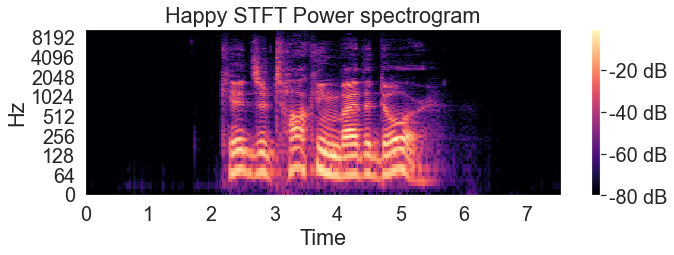

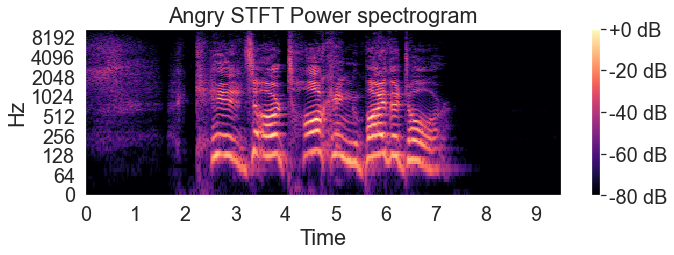

In [42]:
"""
Реализуем спектограммы аудиофайла
"""

def get_stft_spespectrogram(emotion, waveform):
    """
    Функция для получения спектограммы аудиофайла
    """
    # Преобразовываем через кратковременное преобразование Фурье 
    stft_spectrum_matrix = librosa.stft(waveform)
    plt.figure(figsize=(10, 4))
    # С помощью librosa получаем спектограмму
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
    plt.title(f'{emotion} STFT Power spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()

# Получаем наши спектограммы
get_stft_spespectrogram("Happy", happy_waveform)
get_stft_spespectrogram("Angry", angry_waveform)

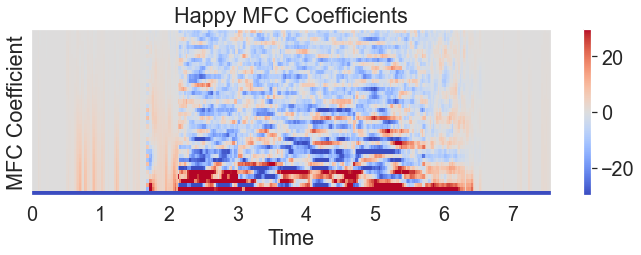

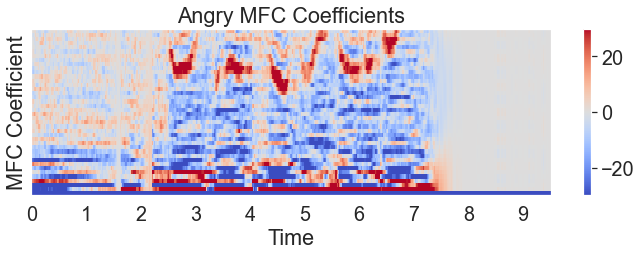

In [43]:
from matplotlib.colors import Normalize

def get_mfc_coefficient(emotion, waveform):
    """
    Реализуем получение Mel Frequency Cepstral Coefficients (MFCC)
    """
    mfc_coefficients = librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
    plt.colorbar()
    plt.yticks(())
    plt.ylabel('MFC Coefficient')
    plt.title(f'{emotion} MFC Coefficients')
    plt.tight_layout()
                                        
get_mfc_coefficient("Happy", happy_waveform)
get_mfc_coefficient("Angry", angry_waveform)

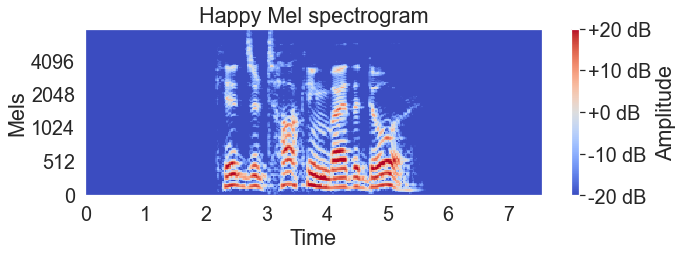

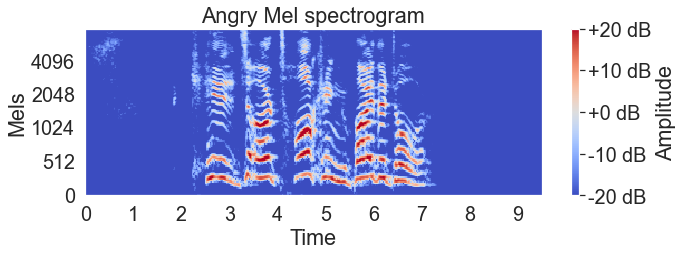

In [44]:
def get_mel_spectrogram(emotion, waveform):
    """
    Реализуем получение Mel Spectogram
    """
    melspectrogram = librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S=melspectrogram, ref=np.mean),y_axis='mel',fmax=8000, x_axis='time', norm=Normalize(vmin=-20,vmax=20))
    plt.colorbar(format='%+2.0f dB',label='Amplitude')
    plt.ylabel('Mels')
    plt.title(f'{emotion} Mel spectrogram')
    plt.tight_layout()

get_mel_spectrogram("Happy", happy_waveform)
get_mel_spectrogram("Angry", angry_waveform)

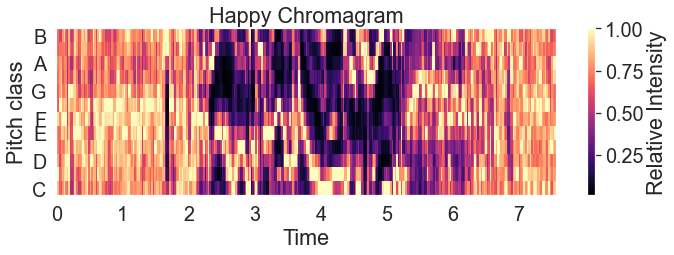

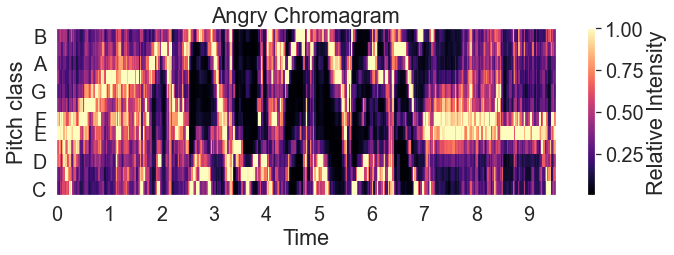

In [45]:
def get_chromagram(emotion, waveform):
    """
    Реализуем получение Chromagram
    """
    chromagram = librosa.feature.chroma_stft(y=waveform, sr=sample_rate)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
    plt.colorbar(label='Relative Intensity')
    plt.title(f'{emotion} Chromagram')
    plt.tight_layout()

get_chromagram("Happy", happy_waveform)
get_chromagram("Angry", angry_waveform)

In [2]:
import librosa

def feature_chromagram(waveform, sample_rate):
    # STFT вычиляем в данном случае напрямую, MFCC и Mel Spectogramm делают это автоматически или "Под капотом"
    stft_spectrogram=np.abs(librosa.stft(waveform))
    # Создаём chromagram для каждого объекта, а после получаем среднее значение каждого слобца полученной матрицы
    # Для создания итогового массива с объектами 
    chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
    return chromagram

def feature_melspectrogram(waveform, sample_rate):
    # Создаём mel spectrogram для каждого объекта, а после получаем среднее значение каждого слобца полученной матрицы
    # Для создания итогового массива с объектами 
    # Использования 8 кГц в качестве верхней границы частоты должно быть достаточно для большинства задач классификации речи
    melspectrogram=np.mean(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000).T,axis=0)
    return melspectrogram

def feature_mfcc(waveform, sample_rate):
    # Создаём MFCCs для каждого объекта, а после получаем среднее значение каждого слобца полученной матрицы
    # Для создания итогового массива с объектами 
    # Получаем 40 коэффицентов
    mfc_coefficients=np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0) 
    return mfc_coefficients

In [3]:
def get_features(file):
    # Загружаем аудиофайл для обработки
     with soundfile.SoundFile(file) as audio:
        waveform = audio.read(dtype="float32")
        sample_rate = audio.samplerate
        # Получаем данные нашего файла
        chromagram = feature_chromagram(waveform, sample_rate)
        melspectrogram = feature_melspectrogram(waveform, sample_rate)
        mfc_coefficients = feature_mfcc(waveform, sample_rate)

        feature_matrix=np.array([])
        # С помощью np.hstack соединяем наши массивы горизонтально для создания итогового массива с объектами 
        feature_matrix = np.hstack((chromagram, melspectrogram, mfc_coefficients))
        
        return feature_matrix

In [4]:
"""
Реализуем функцию, которая будет возвращать нам итоговой массив с объектами всего датасета
"""

import os, glob


def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob(".\\RAVDESS\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        features = get_features(file)
        X.append(features)
        y.append(emotion)
        count += 1
        print('\r' + f' Processed {count}/{1440} audio samples',end=' ')
    # Возвращаем массивы, которые будет использовать для наших моделей
    return np.array(X), np.array(y)

In [6]:
"""
Получаем наши данные для построения моделей
"""

# Создаём отношения между индексами в датасете и эмоциями
emotions ={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

data, emotions = load_data()



 Processed 1440/1440 audio samples 

In [7]:
print(f'\nКоличество обработанных аудиофайлов: {data.shape[0]}')
print(f'Количество числовых характеристик, извлеченных для кадого элемента: {data.shape[1]}')
# Сипользуем pandas для того, чтобы визуализировать данные
data_df = pd.DataFrame(data)
data_df


Количество обработанных аудиофайлов: 1440
Количество числовых характеристик, извлеченных для кадого элемента: 180


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.762871,0.786686,0.769217,0.768762,0.773605,0.766615,0.770437,0.764894,0.780340,0.761150,...,0.457082,-1.399109,-2.926856,0.013957,-0.490734,-0.570905,0.040399,-1.207217,-1.594982,-1.436487
1,0.747417,0.781693,0.774763,0.755513,0.770826,0.783455,0.754270,0.748580,0.766922,0.768814,...,0.275460,-2.521470,-2.987673,0.409735,-0.484184,-1.398391,0.255203,-0.984978,-2.093061,-1.040791
2,0.767132,0.788347,0.785653,0.786579,0.777644,0.755638,0.761176,0.752333,0.774452,0.743741,...,-0.002119,-0.909152,-3.045955,-0.373294,-0.849145,-0.922105,-0.170320,-1.144422,-1.725613,-1.450560
3,0.765556,0.760809,0.754814,0.773621,0.797597,0.785697,0.754200,0.761343,0.742356,0.725235,...,-0.403806,-1.329651,-2.513405,-0.190276,-0.645949,-0.553919,0.459299,-1.580085,-1.647682,-1.509511
4,0.706621,0.751378,0.765777,0.754597,0.759112,0.770332,0.755594,0.741855,0.750051,0.755684,...,0.206463,-2.188582,-2.835501,0.463746,-1.019167,-1.411441,0.350433,-1.519892,-1.250112,-0.613852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.633462,0.580423,0.539717,0.541983,0.569329,0.576741,0.595737,0.595334,0.587991,0.582093,...,-2.279651,-0.956125,1.618874,3.121076,3.300186,0.288353,0.033574,-0.001822,-0.012087,1.695895
1436,0.667961,0.637937,0.599195,0.591554,0.581671,0.556208,0.566106,0.563750,0.556274,0.562026,...,1.828094,2.644069,1.914414,2.924835,2.725102,1.226836,-0.558418,0.307047,-0.687501,0.377813
1437,0.640290,0.588677,0.548105,0.532067,0.551831,0.579697,0.555725,0.533518,0.550872,0.563250,...,-0.276459,0.734496,0.793300,2.693131,1.434806,0.516675,-0.040329,1.729418,-0.209399,0.046916
1438,0.612517,0.594626,0.586922,0.566910,0.584284,0.618568,0.632370,0.574342,0.554251,0.568200,...,1.947711,3.540176,0.957979,1.761636,-0.212034,0.591056,-0.749359,0.786245,-0.634603,0.220848


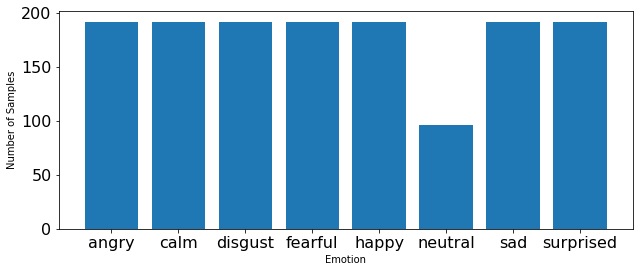

In [8]:
"""
Количество аудиофайлов на определенные эмоции в нашем датасете
"""
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
# С помощью numpy возвращаем уникальные значение и количество каждого из этих значений
emotion_list, count = np.unique(emotions, return_counts=True)
plt.bar(x=range(8), height=count)
plt.xticks(ticks=range(8), labels = [emotion for emotion in emotion_list],fontsize=10)
plt.xlabel('Emotion')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

In [9]:
# df.describe() в данном случае предоставит нам много лишней информации, поэтому найдём необходимые нам метрики сами
def print_data_metircs(df):
    # Получаем метрики chromogram
    data_df_chromagram = df.loc[:,:11]
    chroma_min = data_df_chromagram.min().min()
    chroma_max = data_df_chromagram.max().max()
    
    chroma_mean = data_df_chromagram.stack().mean()
    chroma_stdev = data_df_chromagram.stack().std()
    print(f'12 Chromagram метрики:       \
    min = {chroma_min:.3f}, \
    max = {chroma_max:.3f}, \
    Среднее = {chroma_mean:.3f}, \
    Отклонение = {chroma_stdev:.3f}') 

    # mel spectrogram метрики
    data_df_melspectrogram = df.loc[:,12:139]
    mel_min = data_df_melspectrogram.min().min()
    mel_max = data_df_melspectrogram.max().max()
    
    mel_mean = data_df_melspectrogram.stack().mean()
    mel_stdev = data_df_melspectrogram.stack().std()
    print(f'\n128 Mel Spectrogram метрики: \
    min = {mel_min:.3f}, \
    max = {mel_max:.3f}, \
    Среднее = {mel_mean:.3f}, \
    Отклонение = {mel_stdev:.3f}')

    # MFCC метрики
    data_df_mfcc = df.loc[:,140:179]
    mfcc_min = data_df_mfcc.min().min()
    mfcc_max = data_df_mfcc.max().max()
    
    mfcc_mean = data_df_mfcc.stack().mean()
    mfcc_stdev = data_df_mfcc.stack().std()
    print(f'\n40 MFCC метрики:             \
    min = {mfcc_min:.3f},\
    max = {mfcc_max:.3f},\
    Среднее = {mfcc_mean:.3f},\
    Отклонение = {mfcc_stdev:.3f}')
    
print_data_metircs(data_df)

12 Chromagram метрики:           min = 0.310,     max = 0.874,     Среднее = 0.666,     Отклонение = 0.085

128 Mel Spectrogram метрики:     min = 0.000,     max = 149.208,     Среднее = 0.187,     Отклонение = 1.597

40 MFCC метрики:                 min = -873.242,    max = 115.126,    Среднее = -14.635,    Отклонение = 98.558


In [10]:
"""
Трансформируем наши данные несколькими способами
"""

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# Сохраним в качестве альтернативы
data_scaled = data 
data_scaled = scaler.fit_transform(data_scaled)

scaler = MinMaxScaler()
# Сохраним в качестве альтернативы
data_minmax = data
data_minmax = scaler.fit_transform(data_minmax)

In [11]:
print('\033[1m'+'Стандартное преобразование:\n'+'\033[0m')
data_scaled_df = pd.DataFrame(data_scaled)
print_data_metircs(data_scaled_df)

print('\n\n\033[1m'+'Мин\Макс преобразование:\n'+'\033[0m')
data_minmax_df = pd.DataFrame(data_minmax)
print_data_metircs(data_minmax_df)

Стандартное преобразование:

12 Chromagram метрики:           min = -3.949,     max = 2.640,     Среднее = 0.000,     Отклонение = 1.000

128 Mel Spectrogram метрики:     min = -0.476,     max = 36.543,     Среднее = -0.000,     Отклонение = 1.000

40 MFCC метрики:                 min = -4.208,    max = 6.243,    Среднее = -0.000,    Отклонение = 1.000


Мин\Макс преобразование:

12 Chromagram метрики:           min = 0.000,     max = 1.000,     Среднее = 0.611,     Отклонение = 0.181

128 Mel Spectrogram метрики:     min = 0.000,     max = 1.000,     Среднее = 0.015,     Отклонение = 0.060

40 MFCC метрики:                 min = 0.000,    max = 1.000,    Среднее = 0.406,    Отклонение = 0.166


In [12]:
"""
Разделяем на обучающую и тестовую выборки
"""

from sklearn.model_selection import train_test_split
# Данные без преобразований
X_train, X_test, y_train, y_test = train_test_split(
    data, 
    emotions, 
    test_size=0.2, 
    random_state=69
)

# Данный с стандартным преобразованием
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    data_scaled, 
    emotions, 
    test_size=0.2, 
    random_state=69
)

#Данные с Мин\Макс преобразованием
X_train_minmax, X_test_minmax, _, _ = train_test_split(
    data_minmax, 
    emotions, 
    test_size=0.2, 
    random_state=69
)

In [13]:
"""
Рассматриваем различные модели на данных с стандартным преобразованием
"""

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Список рассматриваемых моделей
classification_models = [
    KNeighborsClassifier(),
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))

scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)

,Classifier,Accuracy Score
1,SVC,57.29%
4,RandomForestClassifier,56.25%
0,KNeighborsClassifier,53.12%
2,SVC RBF kernel,47.57%
3,DecisionTreeClassifier,42.36%
5,AdaBoostClassifier,29.51%
6,GaussianNB,25.69%
7,QuadraticDiscriminantAnalysis,19.44%


In [21]:
"""
Рассматриваем модель метода опорных векторов
"""
from sklearn.svm import SVC

model = SVC(
    C=10,
    gamma='auto',
    kernel='rbf',
    random_state=69
)

model.fit(X_train, y_train)

print(f'SVC Model\'s accuracy on training: {100*model.score(X_train, y_train):.2f}%')
print(f'SVC Model\'s accuracy on test: {100*model.score(X_test, y_test):.2f}%')

SVC Model's accuracy on training: 100.00%
SVC Model's accuracy on test: 52.43%


In [23]:
from sklearn.neighbors import KNeighborsClassifier

####### Default kNN  ########
model = KNeighborsClassifier(
)

model.fit(X_train, y_train)

print(f'Default kNN Model\'s accuracy on training: {100*model.score(X_train, y_train):.2f}%')
print(f'Default kNN Model\'s accuracy on test: {100*model.score(X_test, y_test):.2f}%\n')

##### tuned kNN ######
model = KNeighborsClassifier(
    n_neighbors = 5,
    weights = 'distance',
    algorithm = 'brute',
    leaf_size = '30',
    n_jobs=4
)

model.fit(X_train, y_train)

print(f'kNN Model\'s accuracy on training: {100*model.score(X_train, y_train):.2f}%')
print(f'kNN Model\'s accuracy on test: {100*model.score(X_test, y_test):.2f}%')

Default kNN Model's accuracy on training set is 66.84%
Default kNN Model's accuracy on test set is 43.75%

kNN Model's accuracy on training set is 100.00%
kNN Model's accuracy on test set is 49.65%


In [24]:
from sklearn.ensemble import RandomForestClassifier

####### Default Random Forest ########
model = RandomForestClassifier(
    random_state=69
)

model.fit(X_train, y_train)

print(f'Default Random Forest Model\'s accuracy on training: {100*model.score(X_train, y_train):.2f}%')
print(f'Default Random Forest Model\'s accuracy on test: {100*model.score(X_test, y_test):.2f}%\n')


########## Tuned Random Forest #######
model = RandomForestClassifier(
    n_estimators = 500, 
    criterion ='entropy',
    warm_start = True,
    max_features = 'sqrt',
    oob_score = 'True', # more on this below
    random_state=69  
) 

model.fit(X_train, y_train)

print(f'Random Forest Model\'s accuracy on training: {100*model.score(X_train, y_train):.2f}%')
print(f'Random Forest Model\'s accuracy on test: {100*model.score(X_test, y_test):.2f}%')

Default Random Forest Model's accuracy on training set is 100.00%
Default Random Forest Model's accuracy on test set is 52.43%

Random Forest Model's accuracy on training set is 100.00%
Random Forest Model's accuracy on test set is 56.60%


In [23]:
from sklearn.neural_network import MLPClassifier

# MLP from sklearn
model = MLPClassifier(
    random_state = 69
)

#################### Стандартная выборка  #####################
X_train, X_test, y_train, y_test = train_test_split(
    data, 
    emotions, 
    test_size=0.2, 
    random_state=69
)

model.fit(X_train, y_train)

print(f'Emotions on model:{model.classes_}')
print(f'Unscaled MLP Model\'s accuracy on training: {100*model.score(X_train, y_train):.2f}%')
print(f'Unscaled MLP Model\'s accuracy on test: {100*model.score(X_test, y_test):.2f}%')



Emotions on model:['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Unscaled MLP Model's accuracy on training set is 65.28%
Unscaled MLP Model's accuracy on test set is 51.74%


In [24]:
#################### Мин/Макс преобразование #######################
X_train_minmax, X_test_minmax, _, _ = train_test_split(
    data_minmax, 
    emotions, 
    test_size=0.2, 
    random_state=69
)

model.fit(X_train_minmax, y_train)

print(f'MinMax scaled MLP Model\'s accuracy on training set is {100*model.score(X_train_minmax, y_train):.2f}%')
print(f'MinMax sacled MLP Model\'s accuracy on test set is {100*model.score(X_test_minmax, y_test):.2f}%\n')

#################### Стандартное преобразование #######################
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    data_scaled, 
    emotions, 
    test_size=0.2, 
    random_state=69
)
model.fit(X_train_scaled, y_train)

print(f'Standard scaled MLP Model\'s accuracy on training: {100*model.score(X_train_scaled, y_train):.2f}%')
print(f'Standard scaled MLP Model\'s accuracy on test: {100*model.score(X_test_scaled, y_test):.2f}%')

MinMax scaled MLP Model's accuracy on training set is 64.32%
MinMax sacled MLP Model's accuracy on test set is 52.43%

Standard scaled MLP Model's accuracy on training set is 99.74%
Standard scaled MLP Model's accuracy on test set is 64.93%


In [25]:
from sklearn.model_selection import GridSearchCV

# Данные со стандартным преобразованием
X_train, X_test, y_train, y_test = train_test_split(
    data_scaled, 
    emotions, 
    test_size=0.2, 
    random_state=69
)

# Создаём модель и указываем параметры-константы
model = MLPClassifier(
    batch_size=256,  
    random_state=69
)

# Создаём сетку гиперпараметров
parameter_space = {
    'hidden_layer_sizes': [(8,), (180,), (300,),(100,50,),(10,10,10)], 
    'activation': ['tanh','relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'epsilon': [1e-08, 0.1 ],
    'learning_rate': ['adaptive', 'constant']
}
   
# Создаём объект поиска по сетке
grid = GridSearchCV(
    model, 
    parameter_space,
    cv=10,
    n_jobs=4)

grid.fit(X_train, y_train)


print('Best parameters:\n', grid.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.001, 'epsilon': 1e-08, 'hidden_layer_sizes': (300,), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [38]:
"""
Модель MLP
"""
X_train, X_test, y_train, y_test = train_test_split(
    data_scaled, 
    emotions, 
    test_size=0.2, 
    random_state=69
)

model = MLPClassifier(
    activation='relu', 
    solver='adam', 
    alpha=0.001, 
    beta_1=0.9,
    beta_2=0.999,
    batch_size=256, 
    epsilon=1e-08, 
    hidden_layer_sizes=(300,), 
    learning_rate='adaptive',
    max_iter=300, 
    random_state=69,
)

model.fit(X_train, y_train)

print(f'MLP Model\'s accuracy on training: {100*model.score(X_train, y_train):.2f}%')
print(f'MLP Model\'s accuracy on test: {100*model.score(X_test, y_test):.2f}%')

MLP Model's accuracy on training: 100.00%
MLP Model's accuracy on test: 68.40%


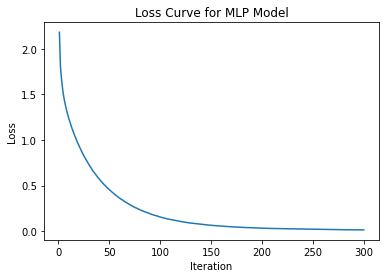

In [28]:
"""
Loss Curve
"""
plt.figure()
plt.plot([num for num in range(1,model.n_iter_ +1)], model.loss_curve_)
plt.title('Loss Curve for MLP Model')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

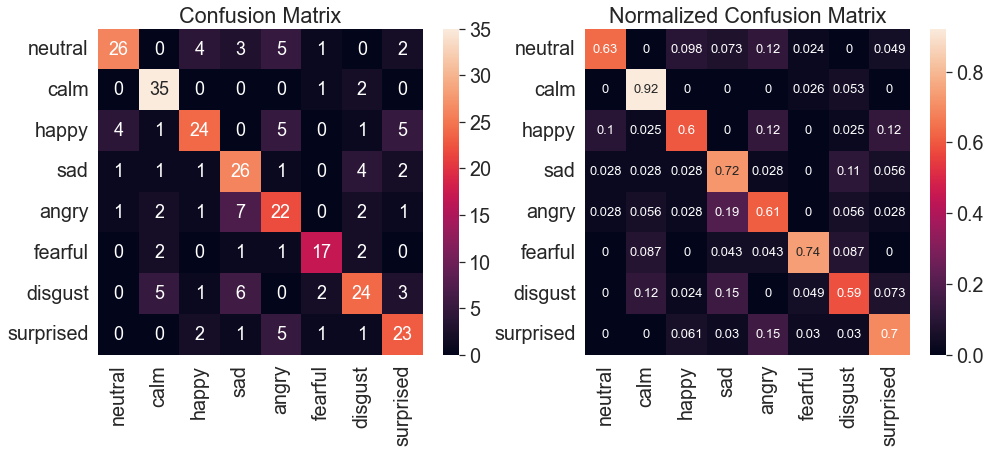

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sn # I like seaborn's confusion matrix over sklearn's default

# получение прогнозов по тестовому набору
test_emotion_predictions = model.predict(X_test)
test_emotion_groundtruth = y_test

# построить матрицу ошибок и нормализованную матрицу ошибок
conf_matrix = confusion_matrix(test_emotion_groundtruth, test_emotion_predictions)
conf_matrix_norm = confusion_matrix(test_emotion_groundtruth, test_emotion_predictions,normalize='true')

# Устанавливаем названия осей
emotion_list =['neutral','calm','happy','sad','angry','fearful','disgust','surprised']
emotion_name = [emotion for emotion in emotion_list]

# создание матрицу ошибок с метками, используя pandas
confmatrix_df = pd.DataFrame(conf_matrix, index=emotion_name, columns=emotion_name)
confmatrix_df_norm = pd.DataFrame(conf_matrix_norm, index=emotion_name, columns=emotion_name)

# Отображаем матрицы ошибок
plt.figure(figsize=(16,6))
sn.set(font_scale=1.8) 
plt.subplot(1,2,1)
plt.title('Confusion Matrix')
sn.heatmap(confmatrix_df, annot=True, annot_kws={"size": 18}) 
plt.subplot(1,2,2)
plt.title('Normalized Confusion Matrix')
sn.heatmap(confmatrix_df_norm, annot=True, annot_kws={"size": 13}) 

plt.show()

In [31]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = model.predict(X_test)
print(f'Test Accuracy score =  {100*accuracy_score(y_test, y_pred):.3f}%') #same as model.score(X_test, y_test)
print(f'Test Precision score =  {100*precision_score(y_test, y_pred, average="macro"):.3f}%')
print(f'Test Recall score =  {100*recall_score(y_test, y_pred, average="macro"):.3f}%')
print(f'Test F-score score =  {100*f1_score(y_test, y_pred, average="macro"):.3}%')

Test Accuracy score =  68.403%
Test Precision score =  69.174%
Test Recall score =  68.875%
Test F-score score =  68.6%


In [37]:
"""
Оценка модели на различных размерах выборки
"""
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(
    n_splits=10, 
    random_state=69, 
    shuffle=True
)

scores = []
for train_indices, test_indices in kfold.split(X_train, y_train):
    # подгонка модели к обучению
    model.fit(X_train[train_indices], y_train[train_indices])
    # Оценка модели
    scores.append(model.score(X_train[test_indices], y_train[test_indices]))

print('KFold CV scores for MLP:');[print(f'{(100*score):.2f}%') for score in scores]
print(f'Среднее значение KFold CV for MLP: {100*np.mean(scores):.2f}% ± {100*np.std(scores):.2f}%')

KFold CV scores for MLP:
65.52%
52.59%
58.26%
63.48%
63.48%
55.65%
61.74%
68.70%
63.48%
56.52%
Среднее значение KFold CV for MLP: 60.94% ± 4.75%


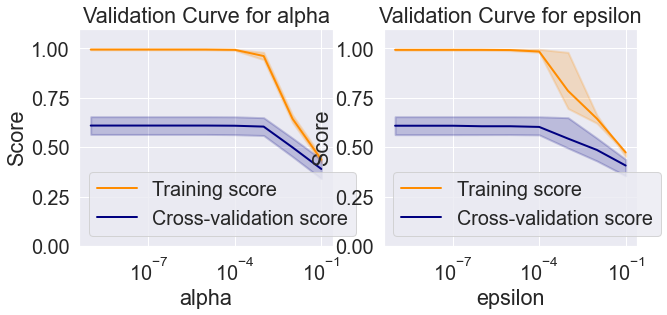

In [35]:
"""
Реализуем кривую проверки
"""
from sklearn.model_selection import validation_curve

X_train, X_test, y_train, y_test = train_test_split(
    data_scaled, 
    emotions, 
    test_size=0.2, 
    random_state=69
)
######## alpha ############
# Без Alpha
model = MLPClassifier(
    activation='logistic', 
    solver='adam', 
    beta_1=0.9,
    beta_2=0.999,
    batch_size=256, 
    # no alpha
    epsilon=1e-08, 
    hidden_layer_sizes=(300,), 
    learning_rate='adaptive',
    max_iter=1000, # I've found for this task, loss converges at ~1000 iterations
    random_state=69,
)
# С alpha
param_range = np.logspace(-8, 0, 9)
train_scores, test_scores = validation_curve(
    model,
    X=X_train, 
    y=y_train, 
    param_name="alpha", 
    param_range=param_range,
    scoring="accuracy",
    cv=10,
    n_jobs=4
)
# Описание полученных данных
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
param_range = np.logspace(-9, -1, 9)

####### epsilon #############
# без epsilon
model = MLPClassifier(
    activation='logistic', 
    solver='adam', 
    alpha=0.001, 
    beta_1=0.9,
    beta_2=0.999,
    batch_size=256, 
    hidden_layer_sizes=(300,), 
    learning_rate='adaptive',
    max_iter=1000,
    random_state=69,
)

# c epsilon
train_scores2, test_scores2 = validation_curve(
    model,
    X=X_train, 
    y=y_train, 
    param_name="epsilon", 
    param_range=param_range,
    scoring="accuracy",
    cv=10,
    n_jobs=4
)
# Описание полученных данных
train_scores_mean2 = np.mean(train_scores2, axis=1)
train_scores_std2 = np.std(train_scores2, axis=1)
test_scores_mean2 = np.mean(test_scores2, axis=1)
test_scores_std2 = np.std(test_scores2, axis=1)


########### alpha plot ##########
# отображаем кривую проверки
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Validation Curve for alpha")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
linewidth = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=linewidth)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=linewidth)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=linewidth)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=linewidth)
plt.legend(loc="best")

########## epsilon plot ##########
# отображаем кривую проверки
plt.subplot(1,2,2)
plt.subplots_adjust(hspace=0.5)
plt.title("Validation Curve for epsilon")
plt.xlabel("epsilon")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean2, label="Training score",
             color="darkorange", lw=linewidth)
plt.fill_between(param_range, train_scores_mean2 - train_scores_std2,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=linewidth)
plt.semilogx(param_range, test_scores_mean2, label="Cross-validation score",
             color="navy", lw=linewidth)
plt.fill_between(param_range, test_scores_mean2 - test_scores_std2,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=linewidth)
plt.legend(loc="best")
plt.show()

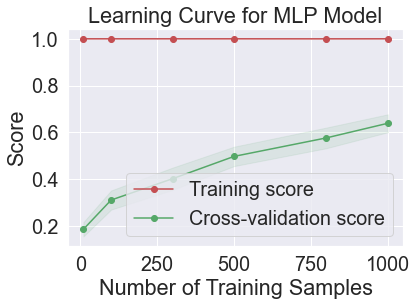

In [36]:
"""
Реализуем кривую обучения
"""

from sklearn.model_selection import learning_curve

# Строим кривую обучения
train_sizes, train_scores, test_scores = learning_curve(
    model, 
    X=X_train, 
    y=y_train, 
    cv=10, 
    shuffle=True,
    random_state=69,
    n_jobs=4, 
    # We have (0.8*1440)/10 = 115/1150 training samples, 1035/1150 test samples  
    train_sizes=[10,100,300,500,800, 1000] # bounded at 1035 for this dataset for 10-fold cv
)
# Получаем описание
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Изображаем привую обучения
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.title('Learning Curve for MLP Model')
plt.xlabel('Number of Training Samples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()